<a href="https://colab.research.google.com/github/airliecassidy/Bike-Sharing-Linear-Regression/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_path = '/content/drive/MyDrive/comp551a1_data/day.csv'

## 1.1 Loading the data
In this step we load the day dataset and inspect the data using pandas

In [ ]:
day_df = pd.read_csv(data_path)

print(day_df.head())
print(day_df.info())
print(day_df.shape)


   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
<class 'pandas.core.frame.

## 1.2 Data cleaning and preprocessing

In [ ]:
day_df_cleaned = day_df.copy()

# Inspect NaN values in the dataset.
print(f"There is a NaN value in the dataset: {day_df_cleaned.isnull().sum().any()}")

# Drop columns that are linearly dependent, encode data leakage, store identifiers, or are irrelevant
day_df_cleaned = day_df_cleaned.drop(columns=['yr', 'instant', 'dteday', 'casual', 'registered'])
day_df_cleaned = day_df_cleaned.drop(columns=['temp', 'weekday', 'season', 'hum', 'windspeed', 'workingday'])
print(f"Initially kept columns include: {list(day_df_cleaned.columns)}")

# Transform the mnth (month) column into 12 one-hot encoded columns that represent the month instead.
month_list = ['january','february', 'march', 'april','may', 'june', 'july', 'august', 'september', 'october', 'november', 'december']
for i, month in enumerate(month_list):
    day_df_cleaned[month] = (day_df_cleaned['mnth'] == i+1).astype('int')
day_df_cleaned = day_df_cleaned.drop(columns=['mnth'])

# Scale the weathersit column from 0 to 1 instead of from 1 to 4.
day_df_cleaned['weathersit'] = (day_df_cleaned['weathersit'] - day_df_cleaned['weathersit'].min())/(day_df_cleaned['weathersit'].max()-day_df_cleaned['weathersit'].min())

day_df_cleaned


There is a NaN value in the dataset: False
Initially kept columns include: ['mnth', 'holiday', 'weathersit', 'atemp', 'cnt']


,holiday,weathersit,atemp,cnt,january,february,march,april,may,june,july,august,september,october,november,december
0,0,0.5,0.363625,985,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0.5,0.353739,801,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0.0,0.189405,1349,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0.0,0.212122,1562,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0.0,0.229270,1600,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,0,0.5,0.226642,2114,0,0,0,0,0,0,0,0,0,0,0,1
727,0,0.5,0.255046,3095,0,0,0,0,0,0,0,0,0,0,0,1
728,0,0.5,0.242400,1341,0,0,0,0,0,0,0,0,0,0,0,1
729,0,0.0,0.231700,1796,0,0,0,0,0,0,0,0,0,0,0,1


# 1.3 Data visualization and exploratory analysis

Text(0.5, 1.0, 'Measured Temperature vs Biker Count')

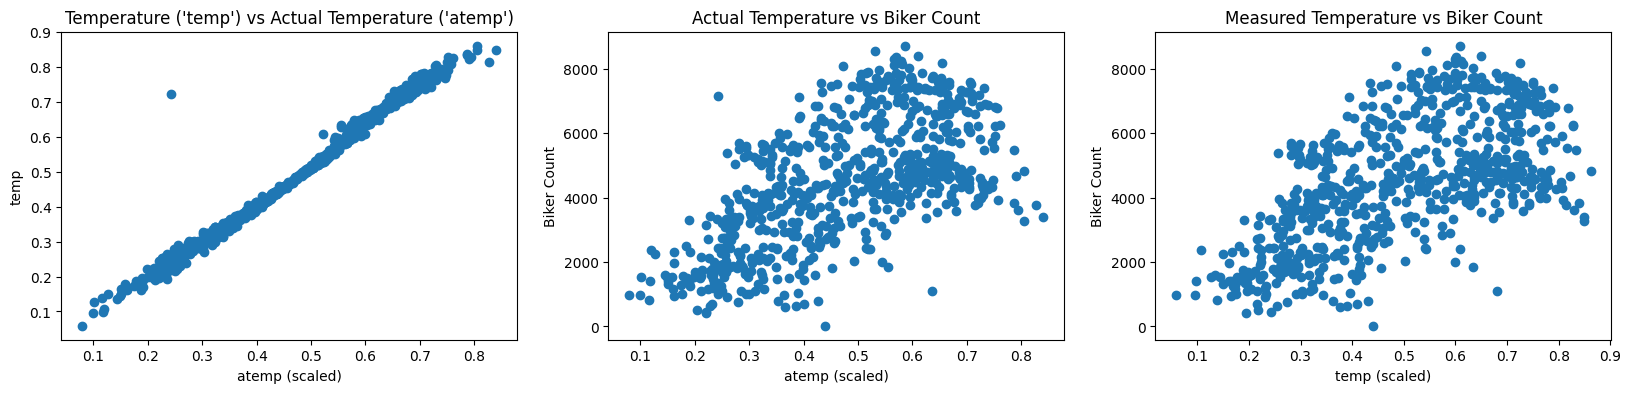

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 4))
# plot weather statistics vs biker count
axes[0].scatter(day_df_original["atemp"], day_df_original["temp"])
axes[0].set_xlabel("atemp (scaled)")
axes[0].set_ylabel("temp")
axes[0].set_title("Temperature ('temp') vs Actual Temperature ('atemp')")

axes[1].scatter(day_df_original["atemp"], day_df_original["cnt"])
axes[1].set_xlabel("atemp (scaled)")
axes[1].set_ylabel("Biker Count")
axes[1].set_title("Actual Temperature vs Biker Count")

axes[2].scatter(day_df_original["temp"], day_df_original["cnt"])
axes[2].set_xlabel("temp (scaled)")
axes[2].set_ylabel("Biker Count")
axes[2].set_title("Measured Temperature vs Biker Count")



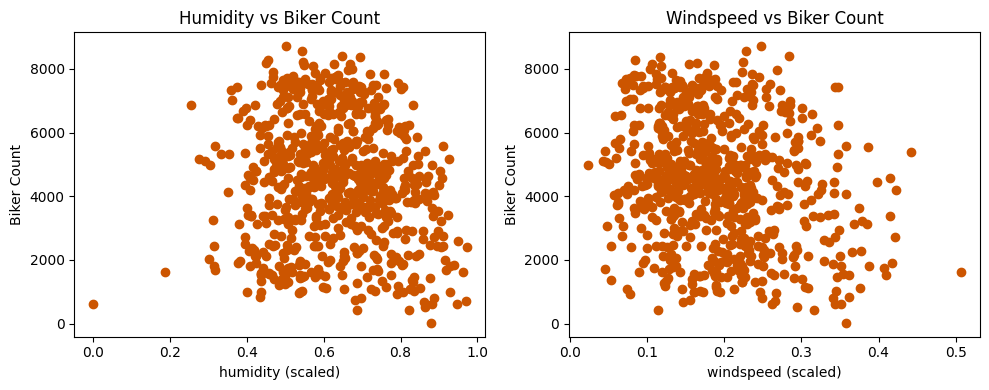

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
# plot other weather statistics vs biker count

axes[0].scatter(day_df_original["hum"], day_df_original["cnt"], color="#CC5500")
axes[0].set_xlabel("humidity (scaled)")
axes[0].set_ylabel("Biker Count")
axes[0].set_title("Humidity vs Biker Count")

axes[1].scatter(day_df_original["windspeed"], day_df_original["cnt"], color="#CC5500")
axes[1].set_xlabel("windspeed (scaled)")
axes[1].set_ylabel("Biker Count")
axes[1].set_title("Windspeed vs Biker Count")

plt.tight_layout()
plt.show()


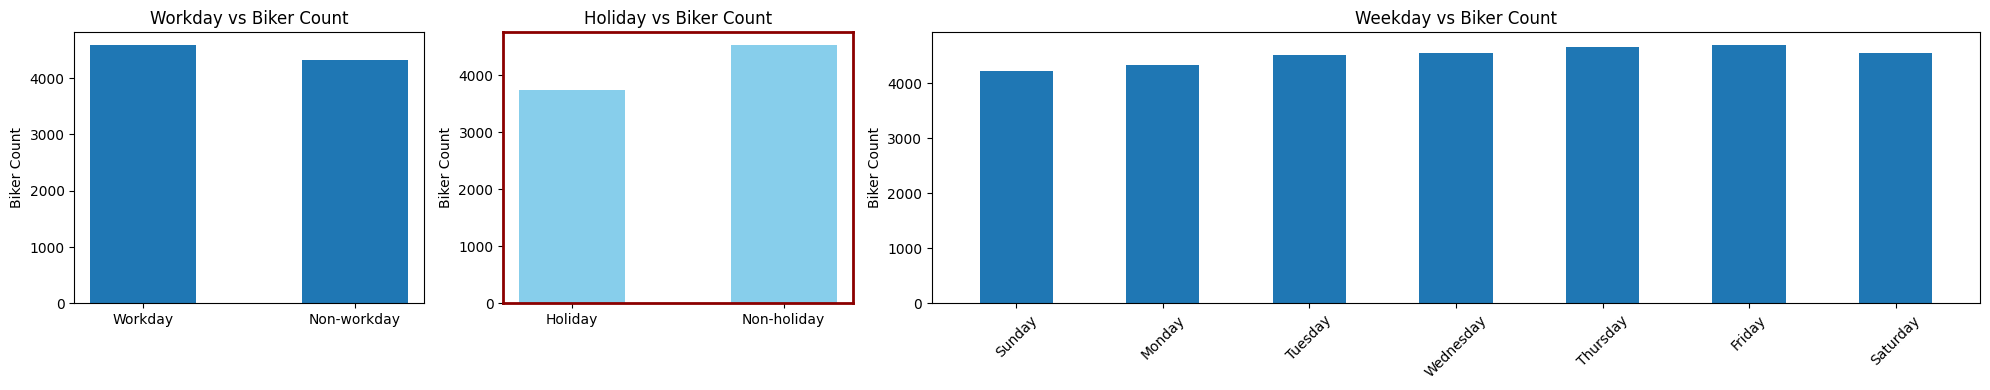

In [ ]:
day_df_original = day_df.copy()
# plot cnt on workdays vs non-workdays
fig, axes = plt.subplots(1, 3, figsize=(20, 4), gridspec_kw={'width_ratios': [1, 1, 3]})

labels = ['Workday', 'Non-workday']
counts = [day_df_original[day_df_original['workingday'] == 1]['cnt'].mean(), day_df_original[day_df_original['workingday'] == 0]['cnt'].mean()]

axes[0].bar(labels, counts, width = 0.5)
axes[0].set_ylabel('Biker Count')
axes[0].set_title('Workday vs Biker Count')

labels = ['Holiday', 'Non-holiday']
counts = [day_df_original[day_df_original['holiday'] == 1]['cnt'].mean(), day_df_original[day_df_original['holiday'] == 0]['cnt'].mean()]

axes[1].bar(labels, counts, width = 0.5, color='skyblue')
axes[1].set_ylabel('Biker Count')
axes[1].set_title('Holiday vs Biker Count')
for spine in axes[1].spines.values():
    spine.set_edgecolor('darkred')
    spine.set_linewidth(2)


labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
counts = day_df_original.groupby('weekday')['cnt'].mean().tolist()

axes[2].bar(labels, counts, width = 0.5)

axes[2].set_ylabel('Biker Count')
axes[2].set_title('Weekday vs Biker Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


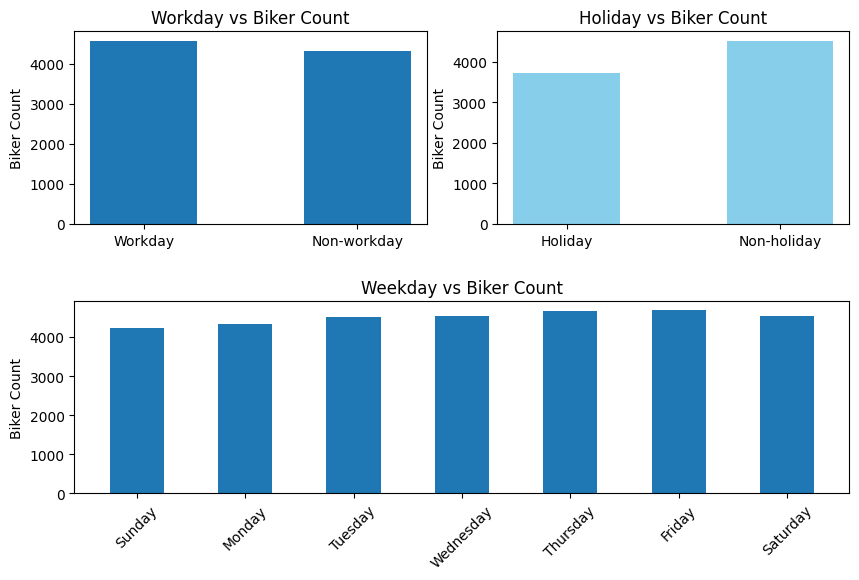

In [ ]:
# Create figure with custom GridSpec
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches

fig = plt.figure(figsize=(10, 6))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1], width_ratios=[1, 1], hspace=0.4)

ax0 = fig.add_subplot(gs[0, 0])
labels = ['Workday', 'Non-workday']
counts = [day_df_original[day_df_original['workingday'] == 1]['cnt'].mean(),
            day_df_original[day_df_original['workingday'] == 0]['cnt'].mean()]
ax0.bar(labels, counts, width=0.5)
ax0.set_ylabel('Biker Count')
ax0.set_title('Workday vs Biker Count')

ax1 = fig.add_subplot(gs[0, 1])
labels = ['Holiday', 'Non-holiday']
counts = [day_df_original[day_df_original['holiday'] == 1]['cnt'].mean(),
            day_df_original[day_df_original['holiday'] == 0]['cnt'].mean()]
ax1.bar(labels, counts, width=0.5, color='skyblue')
ax1.set_ylabel('Biker Count')
ax1.set_title('Holiday vs Biker Count')

ax2 = fig.add_subplot(gs[1, :])
labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
counts = day_df_original.groupby('weekday')['cnt'].mean().tolist()
ax2.bar(labels, counts, width=0.5)
ax2.set_ylabel('Biker Count')
ax2.set_title('Weekday vs Biker Count')
plt.xticks(rotation=45)

plt.show()


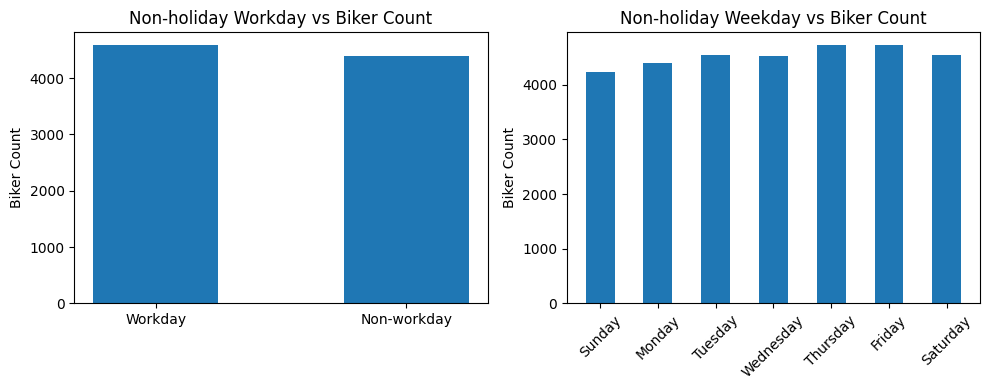

In [ ]:
day_df_original = day_df.copy()
# plot cnt on workdays vs non-workdays given that a day is not a holiday
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

nonholiday_df = day_df_original.copy()
nonholiday_df = nonholiday_df[nonholiday_df['holiday'] == 0]

labels = ['Workday', 'Non-workday']
counts = [nonholiday_df[nonholiday_df['workingday'] == 1]['cnt'].mean(), nonholiday_df[nonholiday_df['workingday'] == 0]['cnt'].mean()]

axes[0].bar(labels, counts, width = 0.5)
axes[0].set_ylabel('Biker Count')
axes[0].set_title('Non-holiday Workday vs Biker Count')

labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
counts = nonholiday_df.groupby('weekday')['cnt'].mean().tolist()

axes[1].bar(labels, counts, width = 0.5)

axes[1].set_ylabel('Biker Count')
axes[1].set_title('Non-holiday Weekday vs Biker Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Very few holidays in the original dataset!
len(day_df_original[day_df_original['holiday'] == 1])/len(day_df_original)

0.028727770177838577

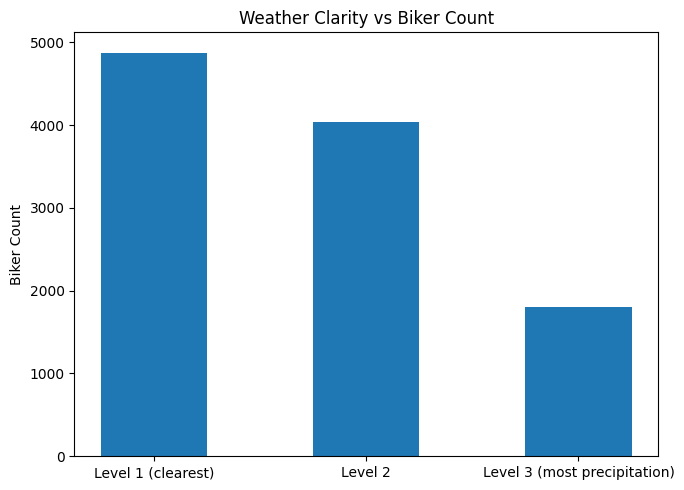

In [ ]:
# plot weathersit on workdays vs non-workdays
fig, ax = plt.subplots(figsize=(7, 5))

labels = ['Level 1 (clearest)', 'Level 2', 'Level 3 (most precipitation)']
counts = day_df_original.groupby('weathersit')['cnt'].mean().tolist()

ax.bar(labels, counts, width = 0.5)
ax.set_ylabel('Biker Count')
ax.set_title('Weather Clarity vs Biker Count')
plt.tight_layout()
plt.show()

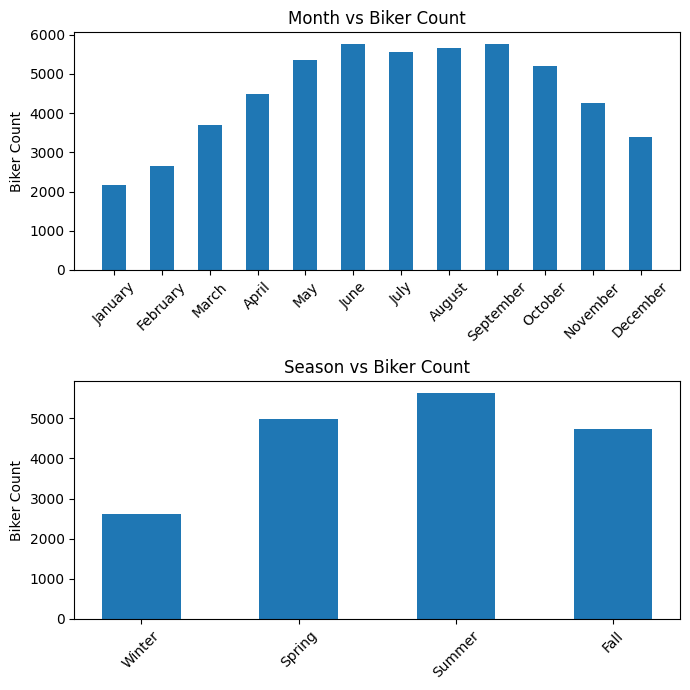

In [ ]:
fig, axes = plt.subplots(2,1, figsize=(7,7))
labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
counts = day_df_original.groupby('mnth')['cnt'].mean().tolist()

axes[0].bar(labels, counts, width = 0.5)
axes[0].set_ylabel('Biker Count')
axes[0].set_title('Month vs Biker Count')
axes[0].tick_params(axis="x", rotation=45)

labels = ['Winter', 'Spring', 'Summer', 'Fall']
counts = day_df_original.groupby('season')['cnt'].mean().tolist()

axes[1].bar(labels, counts, width = 0.5)
axes[1].set_ylabel('Biker Count')
axes[1].set_title('Season vs Biker Count')
axes[1].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()


## 2.1 Model Implementation

In [ ]:
X = day_df_cleaned.drop(columns=['cnt']).values
y = day_df_cleaned['cnt'].values

# code taken from the LinearRegression code review
class LinearRegression:
  def __init__(self, add_bias=True):
    self.add_bias = add_bias
    self.w = None

  def fit(self, x, y):
    if x.ndim == 1:
      x = x[:, None]

    # bias column
    N = x.shape[0]
    if self.add_bias:
      x = np.column_stack([x, np.ones(N)])

    # solve least squares problem
    self.w = np.linalg.lstsq(x, y, rcond=None)[0]
    return self

  def predict(self, x):
    if x.ndim == 1:
      x = x[:, None]
    if self.add_bias:
      x = np.column_stack([x, np.ones(x.shape[0])])

    yh = x @ self.w
    return yh

model = LinearRegression()


## 2.2 Train/Test Split

In [ ]:
# random seed
np.random.seed(42)

# using 20% of sample for test like in Model Selection code review
num_instances = X.shape[0]
n_test = int(num_instances * 0.2)
inds = np.random.permutation(num_instances)

# split indices into train and test
test_inds = inds[:n_test]
train_inds = inds[n_test:]

X_train, y_train = X[train_inds], y[train_inds]
X_test, y_test = X[test_inds], y[test_inds]

print("Training samples:", X_train.shape[0])
print("Test samples:", X_test.shape[0])

model.fit(X_train, y_train)


Training samples: 585
Test samples: 146


## 2.3 Evaluation Metric

In [ ]:
# predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# calculate the MSE
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Training MSE:", train_mse)
print("Test MSE:", test_mse)

Training MSE: 1753634.1140867348
Test MSE: 2157437.037221331


##3.1 Feature-Engineering

In [ ]:
feature_names_before = [c for c in day_df_cleaned.columns if c!= 'cnt']

IDX_ATEMP      = feature_names_before.index('atemp')
IDX_WEATHERSIT = feature_names_before.index('weathersit')
IDX_HOLIDAY    = feature_names_before.index('holiday')

MONTH_NAMES = ['january', 'february', 'march', 'april', 'may', 'june',
               'july', 'august', 'september', 'october', 'november', 'december']
IDX_MONTHS  = [feature_names_before.index(m) for m in MONTH_NAMES]
print("Features before engineering:", feature_names_before)
print(f"Number of features before engineering: {len(feature_names_before)}\n")

def nonLinearTransformations(X):
  """
  This function expands on the original feature matrix X (N x 15) with 18 non-linear columns,
  returning X_eng (N x 33).

  New transformed features added:
  1. Polynomial features
    a. atemp^2: WILL INCLUDE REASONING HERE .
    b. weathersit^2: a squared term shows the convex penalty curve

  2. Interaction terms
    a. atemp x weathersit: On a warm but cloudy day, people still ride,
            but on a cold x rainy day they do not. This multiplication shows
            the multiplicative effect.
    b. atemp x holiday: Holiday riders travel for leisure, so the impact of temperature
            is different compared to daily commuters.

  3. Log transforms
    a. log(1 + atemp): for features normalized to [0,1], log(1+x) adds a concave
            basis function different from the linear and quadratic bases.
    b. log(1 + weathersit): The log compresses the upper tail of weather severity
            differently than x^2 does

  4. Month x temperature interactions
    a. atemp x month_n for each month n: In summer, a 5C increase matters less than the
          same increase in the spring. The 12 terms let the model learn a per-month temperature
          slope, without needing to create a full non-linear model.

  5. ??? Any other feature ideas are welcome

  """
  atemp = X[:, IDX_ATEMP].reshape(-1,1)
  weathersit = X[:, IDX_WEATHERSIT].reshape(-1,1)
  holiday = X[:, IDX_HOLIDAY].reshape(-1,1)
  months_cols = X[:, IDX_MONTHS]

  new_features = np.hstack([
      atemp ** 2,
      weathersit ** 2,

      atemp * weathersit,
      atemp * holiday,

      np.log1p(atemp),
      np.log1p(weathersit),
      months_cols * atemp
  ])
  return np.hstack([X, new_features])

feature_names_after = (feature_names_before
                       + ['atemp^2', 'weathersit^2',
                          'atemp*weathersit', 'atemp*holiday',
                          'log(1+atemp)', 'log(1+weathersit)']
                          +[f'atemp*{m}' for m in MONTH_NAMES])


print("Features after engineering:", feature_names_after)
print(f"Number of features after engineering: {len(feature_names_after)}\n")

X_train_eng = nonLinearTransformations(X_train)
X_test_eng = nonLinearTransformations(X_test)


Features before engineering: ['holiday', 'weathersit', 'atemp', 'january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december']
Number of features before engineering: 15

Features after engineering: ['holiday', 'weathersit', 'atemp', 'january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december', 'atemp^2', 'weathersit^2', 'atemp*weathersit', 'atemp*holiday', 'log(1+atemp)', 'log(1+weathersit)', 'atemp*january', 'atemp*february', 'atemp*march', 'atemp*april', 'atemp*may', 'atemp*june', 'atemp*july', 'atemp*august', 'atemp*september', 'atemp*october', 'atemp*november', 'atemp*december']
Number of features after engineering: 33



##3.2 Model retraining and analysis

  Metric                                 Before        After
  Number of Features                         15           33
  Training MSE                       1753634.11   1447360.87
  Test MSE                           2157437.04   1830086.59
  Training MSE reduction (%)                  —       17.47%


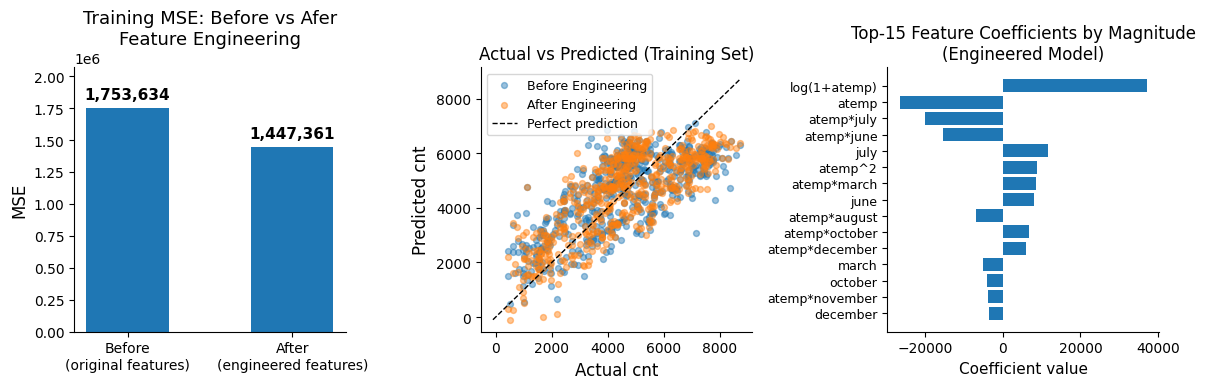

In [ ]:
#BEFORE RETRAINING: linear model on the original features.
model_before = LinearRegression()
model_before.fit(X_train, y_train)
y_train_pred_before = model_before.predict(X_train)
y_test_pred_before = model_before.predict(X_test)
train_mse_before = mean_squared_error(y_train, y_train_pred_before)
test_mse_before = mean_squared_error(y_test, y_test_pred_before)

#AFTER RETRAINING: linear model on new engineered features.
model_after = LinearRegression()
model_after.fit(X_train_eng, y_train)
y_train_pred_after = model_after.predict(X_train_eng)
y_test_pred_after = model_after.predict(X_test_eng)
train_mse_after = mean_squared_error(y_train, y_train_pred_after)
test_mse_after = mean_squared_error(y_test, y_test_pred_after)

#table for comparing the before and after of feature engineering
print("=" * 62)
print(f"  {'Metric':<32} {'Before':>12} {'After':>12}")
print("=" * 62)
print(f"  {'Number of Features':<32} {len(feature_names_before):>12} {len(feature_names_after):>12}")
print(f"  {'Training MSE':<32} {train_mse_before:>12.2f} {train_mse_after:>12.2f}")
print(f"  {'Test MSE':<32} {test_mse_before:>12.2f} {test_mse_after:>12.2f}")
pct = 100 * (1 - train_mse_after / train_mse_before)
print(f"  {'Training MSE reduction (%)':<32} {'—':>12} {pct:>11.2f}%")
print("=" * 62)

#visualization of the feature engineering differences (before v. after)
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
ax = axes[0]
bars = ax.bar(
    ['Before\n(original features)', 'After\n(engineered features)'],
    [train_mse_before, train_mse_after],
    width=0.5, linewidth = 0.8
)
#plot 1: training mse bar chart.
ax.set_ylabel('MSE', fontsize=12)
ax.set_title('Training MSE: Before vs Afer\nFeature Engineering', fontsize=13)
offset = max(train_mse_before, train_mse_after) * 0.025
for bar, val in zip(bars, [train_mse_before, train_mse_after]):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + offset,
            f'{val:,.0f}', ha='center', va='bottom', fontsize=11, fontweight='bold')
ax.set_ylim(0, max(train_mse_before, train_mse_after) * 1.18)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#plot 2: actual vs predicted scatter from the training set
ax = axes[1]
ax.scatter(y_train, y_train_pred_before, alpha=0.45, s=18,
           label='Before Engineering')
ax.scatter(y_train, y_train_pred_after, alpha=0.45, s=18,
           label='After Engineering')
lo = min(y_train.min(), y_train_pred_before.min(), y_train_pred_after.min())
hi = max(y_train.max(), y_train_pred_before.max(), y_train_pred_after.max())
ax.plot([lo, hi], [lo, hi], 'k--', linewidth=1, label='Perfect prediction')
ax.set_xlabel('Actual cnt', fontsize=12)
ax.set_ylabel('Predicted cnt', fontsize=12)
ax.set_title('Actual vs Predicted (Training Set)', fontsize=12)
ax.legend(fontsize=9)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#plot 3: the top 15 coefficients by abs. magnitude.
ax = axes[2]
coefs = model_after.w[:-1] #excluding the bias weight
sorted_idx = np.argsort(np.abs(coefs))[::-1] #decreasing by abs. coefficient
top_k = min(15, len(coefs))
top_idx = sorted_idx[:top_k]
top_names = [feature_names_after[i] for i in top_idx]
top_coefs = coefs[top_idx]

ax.barh(range(top_k), top_coefs, linewidth=0.6)
ax.set_yticks(range(top_k))
ax.set_yticklabels(top_names, fontsize=9)
ax.set_xlabel('Coefficient value', fontsize=11)
ax.set_title('Top-15 Feature Coefficients by Magnitude\n(Engineered Model)', fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.invert_yaxis()

plt.tight_layout()
plt.show()


##Correlation matrices before and after feature enginnering

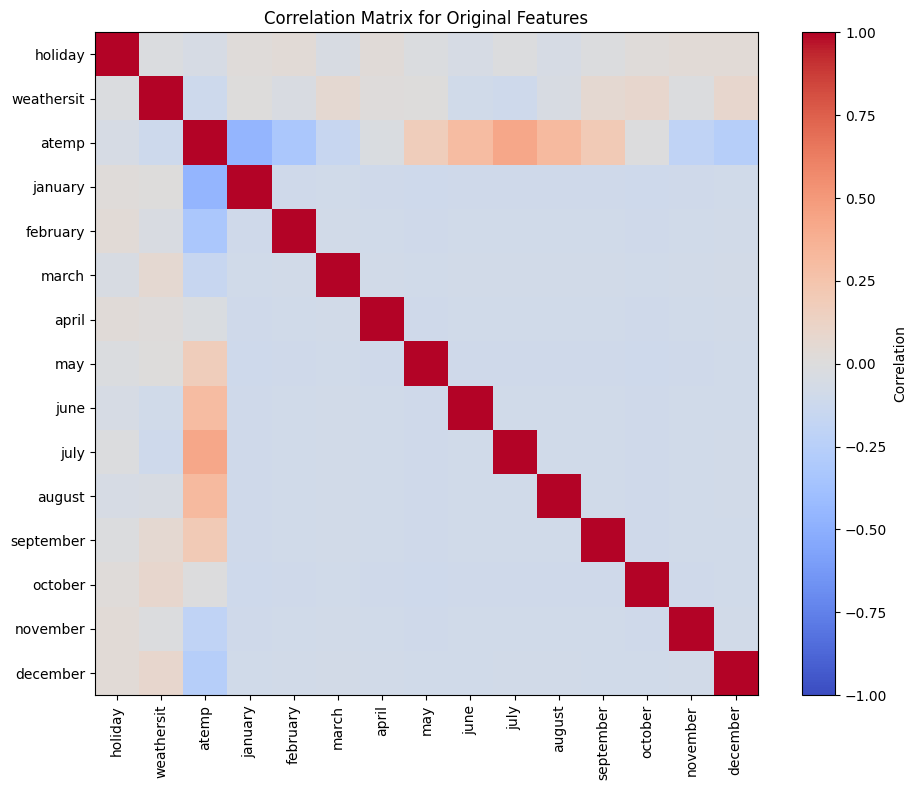

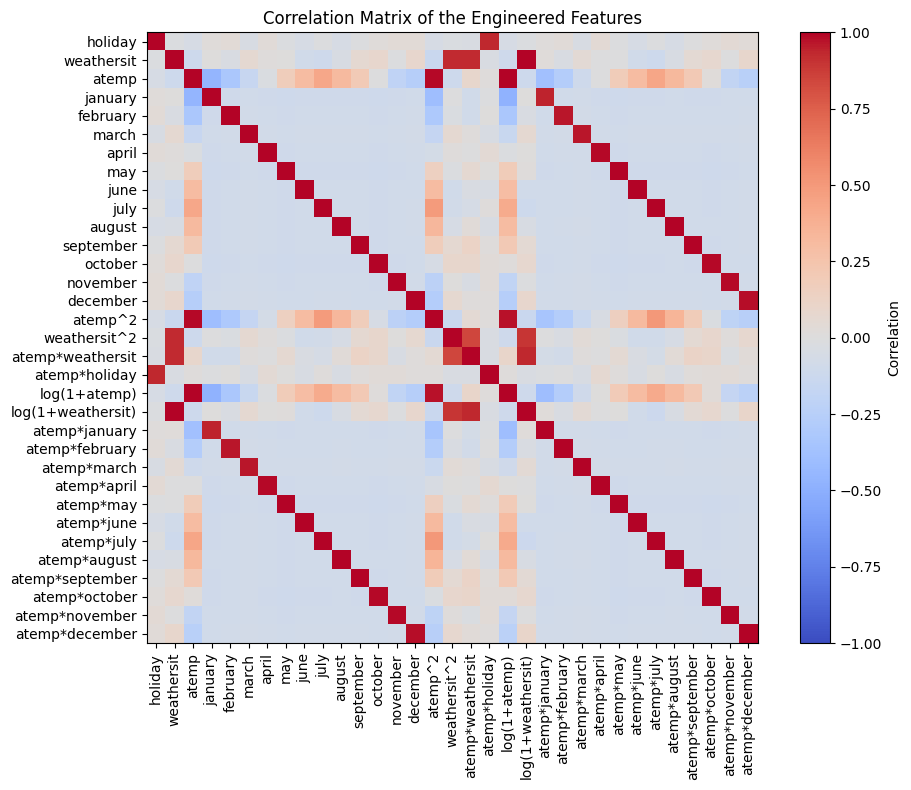

In [ ]:
# correlation matrix BEFORE feature engineering (original features)
corr_before = np.corrcoef(X_train, rowvar=False)

plt.figure(figsize=(10, 8))
plt.imshow(corr_before, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='Correlation')

plt.xticks(np.arange(len(feature_names_before)), feature_names_before, rotation=90)
plt.yticks(np.arange(len(feature_names_before)), feature_names_before)

plt.title("Correlation Matrix for Original Features")
plt.tight_layout()
plt.show()


# correlation matrix AFTER feature enginnering
corr_matrix = np.corrcoef(X_train_eng, rowvar=False)

plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='Correlation')

plt.xticks(ticks=np.arange(len(feature_names_after)), labels=feature_names_after, rotation=90)
plt.yticks(ticks=np.arange(len(feature_names_after)), labels=feature_names_after)

plt.title("Correlation Matrix of the Engineered Features")
plt.tight_layout()
plt.show()

